In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
X = data['data']
Y = data['target']
feature_names = data['feature_names']
class_names = data['target_names']

In [5]:
X.shape

(569, 30)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [8]:
X_train.shape

(426, 30)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(X_train)

PCA(n_components=2)

In [17]:
pca.components_.shapee

(2, 30)

In [18]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [19]:
pca_names

['pca_0', 'pca_1']

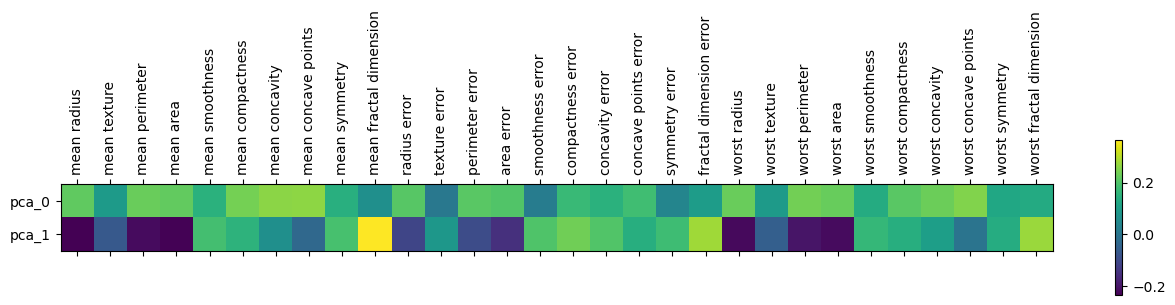

In [20]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]), labels=feature_names, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=pca_names)
plt.colorbar()
plt.show()

In [21]:
# OBJASNJENA VARIJANSA SVAKE OD GLAVINIH KOMPONENTI
pca.explained_variance_

array([13.1425886,  5.9362313])

In [22]:
# UDEO OBJASNJENE VARIJANSE SVAKE OD GLAVNIH KOMPONENTI
pca.explained_variance_ratio_

array([0.43705792, 0.19740988])

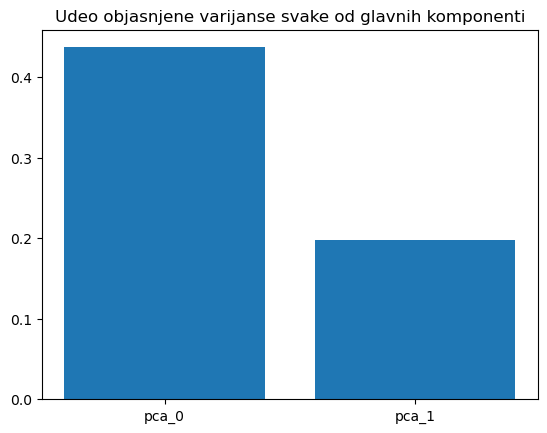

In [23]:
plt.bar(x=pca_names, height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse svake od glavnih komponenti')
plt.show()

In [24]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

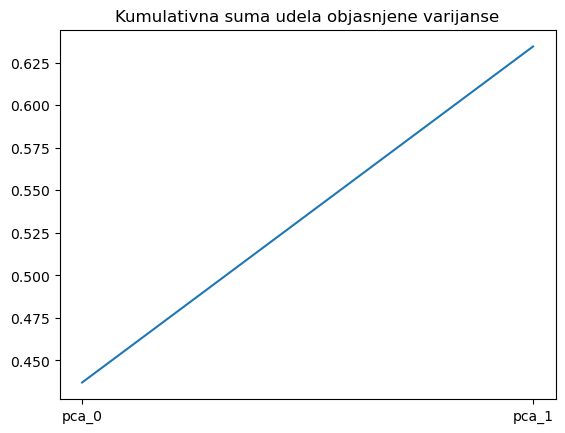

In [25]:
plt.plot(pca_names, cumulative_variance_ratio)
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

In [26]:
X_train_pca = pca.transform(X_train)

In [27]:
X_test_pca = pca.transform(X_test)

In [28]:
X_train_pca.shape

(426, 2)

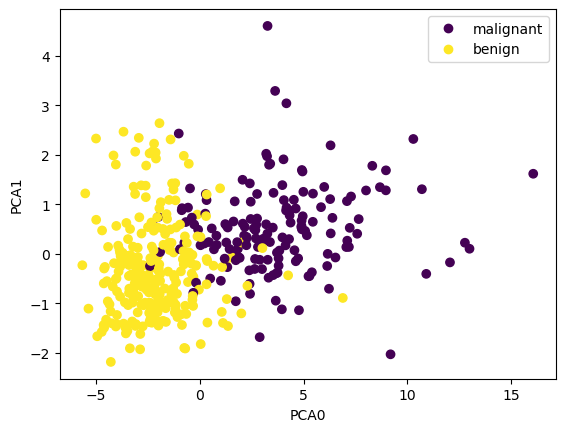

In [29]:
scatter = plt.scatter(X_train_pca[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()

In [31]:
pca.inverse_transform(np.random.random(size=(1,2)))

array([[0.03142699, 0.02473982, 0.04264547, 0.03456382, 0.14780395,
        0.18594091, 0.1642904 , 0.1304006 , 0.14719913, 0.16834884,
        0.07242649, 0.03310071, 0.07972069, 0.05267983, 0.082356  ,
        0.17908854, 0.15389194, 0.15019835, 0.08556573, 0.15550206,
        0.04192017, 0.03025375, 0.05405381, 0.04177678, 0.1334997 ,
        0.16605343, 0.16170433, 0.13415411, 0.11642052, 0.17303285]])